## Experiment-1

AIM: To understand how the Machine learning model classifies headlines and articles into one of the 4 target variables (agree, disagree,discuss and unrelated) 

## Loading the important Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import re
from collections import defaultdict
#from data.scorer import score_submission, print_confusion_matrix, score_defaults, SCORE_REPORT
from nltk import word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [ ]:
#DATASET_PATH = os.path.join(os.getcwd(),"C:\\Users\\Shreyansh\\Abhinav\data","")

Train_data2 = pd.read_csv("3_features.csv",encoding='ISO-8859-1')   # dataset with 3-features were used as predictors

In [ ]:
Train_data2.columns

Index(['Unnamed: 0', 'Headline', 'Stance', 'articleBody', 'stance_cat',
       'stance_base', 'jaccard_similarity', 'Headline_pos', 'articleBody_pos',
       'jaccard_similarity_nouns', 'Headline_Nouns',
       'articleBody_pos_lemmatized', 'Headline_pos_lemmatized', 'LDA_Score'],
      dtype='object')

In [ ]:
Train_data2.head(2)

,Unnamed: 0,Headline,Stance,articleBody,stance_cat,stance_base,jaccard_similarity,Headline_pos,articleBody_pos,jaccard_similarity_nouns,Headline_Nouns,articleBody_pos_lemmatized,Headline_pos_lemmatized,LDA_Score
0,0,ab de villiers wife danielle welcomed newborn ...,Agree,south africa royal challengers bangalore batsm...,0,related,168.224299,villiers welcomed newborn family daughter yent...,welcomed bangalore photo addition parents succ...,285.714286,villiers family daughter yente danielle wife ab,welcome bangalore photo addition parent succes...,villiers welcome newborn family daughter yente...,0.0
1,1,ab de villiers wife danielle welcomed newborn ...,Agree,ani pretoria former south african cricketer ab...,0,related,211.764706,villiers welcomed newborn family daughter yent...,smile welcomed royal duo villers girl standing...,315.789474,villiers family daughter yente danielle wife ab,smile welcome royal duo villers girl stand ban...,villiers welcome newborn family daughter yente...,0.0


In [ ]:
#Train_data_stances['Body ID'].dtype

In [ ]:
Train_data_articleBody = Train_data2[["articleBody_pos"]]                   # used headline and articles with parts of speech tagging (considered only Noun,adverb,verb,adjective)
Train_data_articleBody.rename(columns = {'articleBody_pos': 'articleBody'}, inplace = True)
Train_data_stances = Train_data2[["Headline_pos","Stance"]]
Train_data_stances.rename(columns = {'Headline_pos': 'Headline'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
Train_data_articleBody.head(2)

,articleBody
0,welcomed bangalore photo addition parents succ...
1,smile welcomed royal duo villers girl standing...


In [ ]:
Train_data_articleBody.shape

(212, 1)

In [ ]:
Train_data_stances.head(2)

,Headline,Stance
0,villiers welcomed newborn family daughter yent...,Agree
1,villiers welcomed newborn family daughter yent...,Agree


# Loading the contents

In [ ]:
Train_1 = Train_data2[["Headline_pos","articleBody_pos","Stance"]] 

In [ ]:
Train_1.head()

,Headline_pos,articleBody_pos,Stance
0,villiers welcomed newborn family daughter yent...,welcomed bangalore photo addition parents succ...,Agree
1,villiers welcomed newborn family daughter yent...,smile welcomed royal duo villers girl standing...,Agree
2,villiers welcomed newborn family daughter yent...,smile welcomed royal duo villers girl standing...,Agree
3,villiers welcomed newborn family daughter yent...,smile welcomed royal duo villers girl standing...,Agree
4,villiers welcomed newborn family daughter yent...,pulled welcomed fans postponed bangalore india...,Agree


In [ ]:
Train = Train_1.copy()

In [ ]:
#  create function to Tokenise text
pattern = re.compile("[^a-zA-Z0-9 ]+")  # strip punctuation, symbols, etc.
stop_words = set(stopwords.words('english'))
def tokenise(text):
    text = pattern.sub('', str(text).replace('\n', ' ').replace('-', ' ').lower())
    text = [word for word in word_tokenize(text) if word not in stop_words]
    return text


In [ ]:
#def tokenize(co)
tokenize_list = []
for i in Train["Headline_pos"]:
    tokenize_list.append(tokenise(i))
    


In [ ]:
tokenize_list_article = []
for i in Train["articleBody_pos"]:
    tokenize_list_article.append(tokenise(i))
    

In [ ]:
Train["articleBody_pos"] = tokenize_list_article  # add tokenized articles(POS) to main datafram

In [ ]:
Train["Headline_pos"] = tokenize_list  # add tokenized headline (POS) to main datafram

In [ ]:
Train.head()  

,Headline_pos,articleBody_pos,Stance
0,"[villiers, welcomed, newborn, family, daughter...","[welcomed, bangalore, photo, addition, parents...",Agree
1,"[villiers, welcomed, newborn, family, daughter...","[smile, welcomed, royal, duo, villers, girl, s...",Agree
2,"[villiers, welcomed, newborn, family, daughter...","[smile, welcomed, royal, duo, villers, girl, s...",Agree
3,"[villiers, welcomed, newborn, family, daughter...","[smile, welcomed, royal, duo, villers, girl, s...",Agree
4,"[villiers, welcomed, newborn, family, daughter...","[pulled, welcomed, fans, postponed, bangalore,...",Agree


In [ ]:
Train["Headline_pos"] = Train["Headline_pos"].str.join(', ')  
Train["articleBody_pos"] = Train["articleBody_pos"].str.join(', ')

In [ ]:
Train.head()

,Headline_pos,articleBody_pos,Stance
0,"villiers, welcomed, newborn, family, daughter,...","welcomed, bangalore, photo, addition, parents,...",Agree
1,"villiers, welcomed, newborn, family, daughter,...","smile, welcomed, royal, duo, villers, girl, st...",Agree
2,"villiers, welcomed, newborn, family, daughter,...","smile, welcomed, royal, duo, villers, girl, st...",Agree
3,"villiers, welcomed, newborn, family, daughter,...","smile, welcomed, royal, duo, villers, girl, st...",Agree
4,"villiers, welcomed, newborn, family, daughter,...","pulled, welcomed, fans, postponed, bangalore, ...",Agree


In [ ]:
Train_1.iloc[1,0]

'villiers welcomed newborn family daughter yente danielle wife ab'

In [ ]:
t_array = np.array(Train_1)
t_array[1,0]

'villiers welcomed newborn family daughter yente danielle wife ab'

In [ ]:
# Compute term-frequency of words in documents
def doc_to_tf(text, ngram=1):
    words = tokenise(text)
    ret = defaultdict(float)
    for i in range(len(words)):
        for j in range(1, ngram+1):
            if i - j < 0:
                break
            word = [words[i-k] for k in range(j)]
            ret[word[0] if ngram == 1 else tuple(word)] += 1.0
    return ret

In [ ]:
basket = []
for i in range(len(t_array)):
    #print(doc_to_tf(text = t_array[i,0]))
    basket.append(doc_to_tf(text = t_array[i,0]))

In [ ]:
print(len(basket))
print(basket[5])

25413
defaultdict(<class 'float'>, {'features': 1.0, 'leaked': 1.0, 'iphones': 1.0, 'apple': 1.0})


In [ ]:
len(np.array(Train_1["Headline_pos"]))

212

In [ ]:
Train_1.head(10)

,Headline_pos,articleBody_pos,Stance
0,villiers welcomed newborn family daughter yent...,welcomed bangalore photo addition parents succ...,Agree
1,villiers welcomed newborn family daughter yent...,smile welcomed royal duo villers girl standing...,Agree
2,villiers welcomed newborn family daughter yent...,smile welcomed royal duo villers girl standing...,Agree
3,villiers welcomed newborn family daughter yent...,smile welcomed royal duo villers girl standing...,Agree
4,villiers welcomed newborn family daughter yent...,pulled welcomed fans postponed bangalore india...,Agree
5,villiers welcomed newborn family daughter yent...,welcomed extended postponed bangalore internat...,Agree
6,villiers welcomed newborn family daughter yent...,view news ios pic welcomed updates girl daniel...,Agree
7,covaccine covidshield got banned,germany union monday cause certain uncommon pr...,Disagree
8,covaccine covidshield got banned,germany suit indian says scientists vaccinated...,Disagree
9,covaccine covidshield got banned,steep countrywide punebased pharma monday carr...,Disagree


In [ ]:
Train_1.iloc[2,0]

'villiers welcomed newborn family daughter yente danielle wife ab'

In [ ]:
# Build corpus of article bodies and headlines in training dataset
corpus = np.r_[t_array[:, 1], t_array[:, 0]]  # 0 to 44973 are bodies, 44974 to 89943 are headlines

#print(corpus[44974//100])
#print(corpus[0])

In [ ]:
len(corpus)

424

In [ ]:
99944/2

49972.0

In [ ]:
len(t_array[:, 1])

212

In [ ]:
# Learn idf of every word in the corpus
df = defaultdict(float)
for doc in tqdm(corpus):
    words = tokenise(doc)
    seen = set()
    for word in words:
        if word not in seen:
            df[word] += 1.0
            seen.add(word)

#print(list(df.items())[:10])

100%|██████████████████████████████████████████████████████████████████████████████| 424/424 [00:00<00:00, 1736.14it/s]


In [ ]:
num_docs = corpus.shape[0]
idf = defaultdict(float)
for word, val in tqdm(df.items()):
    idf[word] = np.log((1.0 + num_docs) / (1.0 + val)) + 1.0  # smoothed idf

print(list(idf.items())[:10])

100%|██████████████████████████████████████████████████████████████████████████| 7794/7794 [00:00<00:00, 380736.37it/s]

[('welcomed', 4.279500446684636), ('bangalore', 3.874035338576471), ('photo', 4.161717411028253), ('addition', 4.218875824868201), ('parents', 5.665794807804526), ('successful', 5.665794807804526), ('got', 3.7562523029200876), ('john', 5.442651256490317), ('onbeskryklik', 5.106179019869104), ('grateful', 4.972647627244581)]


GloVe Feature Extraction technique

In [ ]:
# Load GLoVe word vectors
f_glove = open(r"C:\Users\Shreyansh\Abhinav\data\glove.6B.50d.txt", "rb")  # download from https://nlp.stanford.edu/projects/glove/
glove_vectors = {}
for line in tqdm(f_glove):
    glove_vectors[str(line.split()[0]).split("'")[1]] = np.array(list(map(float, line.split()[1:])))

print(glove_vectors['glove'])

400000it [00:11, 36176.36it/s]

[-1.2879   -0.14538  -0.016613  1.1387    1.1317    0.20705  -0.47351
  0.15898   0.67879   0.2382    0.11621   0.26053  -0.8379    1.1232
  0.31469  -0.47904  -0.33717  -0.34492  -0.72053  -1.0543   -0.58476
 -0.42184  -0.56977  -1.1697   -0.50389  -1.4706   -0.22005   1.1314
  1.0829   -1.5477    0.77931  -0.22865   0.33369   0.52067   0.22109
  1.1267    0.11704   1.1647    0.5875   -0.079243  0.022386  0.90118
 -0.37459   0.82637  -0.41061  -0.95039   0.44121  -0.58558   0.12594
 -0.71778 ]


In [ ]:
# Convert a document to GloVe vectors, by computing tf-idf of each word * GLoVe of word / total tf-idf for document
def doc_to_glove(doc):
    doc_tf = doc_to_tf(doc)
    doc_tf_idf = defaultdict(float)
    for word, tf in doc_tf.items():
        doc_tf_idf[word] = tf * idf[word]
        
    doc_vector = np.zeros(glove_vectors['glove'].shape[0])
    if np.sum(list(doc_tf_idf.values())) == 0.0:  # edge case: document is empty
        return doc_vector
    
    for word, tf_idf in doc_tf_idf.items():
        if word in glove_vectors:
            doc_vector += glove_vectors[word] * tf_idf
    doc_vector /= np.sum(list(doc_tf_idf.values()))
    return doc_vector



In [ ]:
glove_headline = []
for i in range(len(t_array)):
    glove_headline.append(doc_to_glove(t_array[i, 0]))

In [ ]:
glove_headline[:10]

[array([ 0.33269946,  0.55483269, -0.06190495, -0.30818974,  0.64315097,
         0.62104654, -0.4791666 ,  0.14079656,  0.02013338, -0.1913347 ,
         0.30317227,  0.31674555, -0.05925187, -0.28481785,  0.43175645,
         0.20327727, -0.59760263, -0.08641741,  0.2135973 ,  0.25038671,
        -0.00947598,  0.67264614, -0.03642123, -0.03973158,  0.24946048,
        -0.96524932, -0.25087619, -0.32130252, -0.20516491,  0.09603008,
         0.99711737,  0.21244378, -0.07044095,  0.36507954,  0.37774453,
        -0.30091184,  0.10626306, -0.00845811,  0.41154982, -0.14371404,
        -0.08252437,  0.19121767,  0.03922226, -0.37256161,  0.34331371,
        -0.15383554, -0.36888384, -0.68377103,  0.06393945,  0.16953702]),
 array([ 0.33269946,  0.55483269, -0.06190495, -0.30818974,  0.64315097,
         0.62104654, -0.4791666 ,  0.14079656,  0.02013338, -0.1913347 ,
         0.30317227,  0.31674555, -0.05925187, -0.28481785,  0.43175645,
         0.20327727, -0.59760263, -0.08641741,  0

## For Article

In [ ]:
t_array[8,1]

'germany suit indian says scientists vaccinated rare sweden instance astrazeneca woman cases forms march reports division safe france full clots serious scientist germanybased report health valid suspend week sideeffects quoted vein analysed thrombosis following said vaccine ema events reported soumya head immune review institute officials recommendations monitoring bleeding iceland italy bruising probed bulk precautionary observed wait instances complete needs measure major disease european recommend coronavirus diseases caused drive rules panda medicines thrombocytopenia suspended continue chief swaminathan reason vaccination vaccinating say steps death research based ruled last friday safety latvia administered several lead country number link epidemiology first world nations deficiency read underlying india halt panic followed news paulehrlichinstitut council process denmark medical corresponds possible use vaccinations time organization platelets inoculated countries take called c

In [ ]:
# Compute term-frequency of words in documents
def doc_to_tf(text, ngram=1):          #ngram=1
    words = tokenise(text)
    ret = defaultdict(float)
    for i in range(len(words)):
        for j in range(1, ngram+1):
            if i - j < 0:
                break
            word = [words[i-k] for k in range(j)]
            ret[word[0] if ngram == 1 else tuple(word)] += 1.0
    return ret

In [ ]:
basket_article = []
for i in range(len(t_array)):
    #print(doc_to_tf(text = t_array[i,0]))
    basket_article.append(doc_to_tf(text = t_array[i,1]))

In [ ]:
print(len(basket_article))
print(basket_article[5])

212
defaultdict(<class 'float'>, {'extended': 1.0, 'postponed': 1.0, 'bangalore': 1.0, 'international': 1.0, 'photo': 1.0, 'addition': 1.0, 'stage': 1.0, 'represents': 1.0, 'parents': 1.0, 'cape': 1.0, 'comeback': 1.0, 'wanted': 1.0, 'future': 1.0, 'got': 1.0, 'expected': 1.0, 'john': 1.0, 'grapples': 1.0, 'forms': 1.0, 'sunrisers': 1.0, 'march': 1.0, 'onbeskryklik': 1.0, 'grateful': 1.0, 'average': 1.0, 'adorable': 1.0, 'family': 1.0, 'league': 1.0, 'beautiful': 1.0, 'period': 1.0, 'become': 1.0, 'son': 1.0, 'bash': 1.0, 'tour': 1.0, 'groot': 1.0, 'ipl': 1.0, 'trophy': 1.0, 'child': 1.0, 'eliminator': 1.0, 'wrote': 1.0, 'leading': 1.0, 'overseas': 1.0, 'make': 1.0, 'sharing': 1.0, 'ab': 1.0, 'announced': 1.0, 'runs': 1.0, 'genade': 1.0, 'bbl': 1.0, 'shared': 1.0, 'africa': 1.0, 'matches': 1.0, 'town': 1.0, 'handle': 1.0, 'marchapril': 1.0, 'wait': 1.0, 'little': 1.0, 'measure': 1.0, 'yente': 1.0, 'featured': 1.0, 'named': 1.0, 'close': 1.0, 'cup': 1.0, 'lost': 1.0, 'third': 1.0, 'coro

In [ ]:
Train_1.iloc[2,1]

'smile welcomed royal duo villers girl standing bangalore addition groot ipl losing smashed villiers eliminator south villierson dankie captioned batsman former rcb hyderabad bowed showpiece postin concluded perfect ab announced cricketer challengers runs thursdayde righthanded virat daughter heartwarming genade srh shared registered strike wife man rate edition sunrisers seen share african kohliled pretoria halfcenturies onbeskryklik grateful eventde blessing baby instagram family yente world named measure revealed tournament side batting beautiful line mainstay picture'

In [ ]:
# Build corpus of article bodies and headlines in training dataset
corpus = np.r_[t_array[:, 1], t_array[:, 0]]  # 0 to 44973 are bodies, 44974 to 89943 are headlines

#print(corpus[44974//100])
#print(corpus[0])

In [ ]:
len(corpus)

424

In [ ]:
99944/2

49972.0

In [ ]:
len(t_array[:, 1])

212

In [ ]:
# Learn idf of every word in the corpus
df = defaultdict(float)
for doc in tqdm(corpus):
    words = tokenise(doc)
    seen = set()
    for word in words:
        if word not in seen:
            df[word] += 1.0
            seen.add(word)

#print(list(df.items())[:10])

100%|██████████████████████████████████████████████████████████████████████████████| 424/424 [00:00<00:00, 1755.60it/s]


In [ ]:
num_docs = corpus.shape[0]
idf = defaultdict(float)
for word, val in tqdm(df.items()):
    idf[word] = np.log((1.0 + num_docs) / (1.0 + val)) + 1.0  # smoothed idf

#print(list(idf.items())[:10])

100%|██████████████████████████████████████████████████████████████████████████| 7794/7794 [00:00<00:00, 487058.69it/s]


In [ ]:
# Load GLoVe word vectors
f_glove = open(r"C:\Users\Shreyansh\Abhinav\data\glove.6B.50d.txt", "rb")  # download from https://nlp.stanford.edu/projects/glove/
glove_vectors = {}
for line in tqdm(f_glove):
    glove_vectors[str(line.split()[0]).split("'")[1]] = np.array(list(map(float, line.split()[1:])))

print(glove_vectors['glove'])

400000it [00:09, 41863.20it/s]

[-1.2879   -0.14538  -0.016613  1.1387    1.1317    0.20705  -0.47351
  0.15898   0.67879   0.2382    0.11621   0.26053  -0.8379    1.1232
  0.31469  -0.47904  -0.33717  -0.34492  -0.72053  -1.0543   -0.58476
 -0.42184  -0.56977  -1.1697   -0.50389  -1.4706   -0.22005   1.1314
  1.0829   -1.5477    0.77931  -0.22865   0.33369   0.52067   0.22109
  1.1267    0.11704   1.1647    0.5875   -0.079243  0.022386  0.90118
 -0.37459   0.82637  -0.41061  -0.95039   0.44121  -0.58558   0.12594
 -0.71778 ]


In [ ]:
# Convert a document to GloVe vectors, by computing tf-idf of each word * GLoVe of word / total tf-idf for document
def doc_to_glove(doc):
    doc_tf = doc_to_tf(doc)
    doc_tf_idf = defaultdict(float)
    for word, tf in doc_tf.items():
        doc_tf_idf[word] = tf * idf[word]
        
    doc_vector = np.zeros(glove_vectors['glove'].shape[0])
    if np.sum(list(doc_tf_idf.values())) == 0.0:  # edge case: document is empty
        return doc_vector
    
    for word, tf_idf in doc_tf_idf.items():
        if word in glove_vectors:
            doc_vector += glove_vectors[word] * tf_idf
    doc_vector /= np.sum(list(doc_tf_idf.values()))
    return doc_vector



In [ ]:
glove_article = []
for i in range(len(t_array)):
    glove_article.append(doc_to_glove(t_array[i, 1]))

In [ ]:
glove_article[10]

array([ 0.24944906,  0.01270307,  0.04333798,  0.01360225, -0.10284287,
        0.02339025, -0.29621322, -0.13422801,  0.2381476 , -0.17886502,
        0.01288713, -0.04457097,  0.00641934,  0.05143902,  0.05569201,
        0.20803311, -0.11845131,  0.05552329,  0.08567975, -0.14430477,
        0.19686164, -0.05085536, -0.10740593,  0.16035365, -0.24411117,
       -0.68727532,  0.04170302, -0.10241403, -0.20016445, -0.07364554,
        1.74454855,  0.21752061, -0.22254035, -0.21230207,  0.16307111,
        0.09890283,  0.24044105,  0.061016  ,  0.07595674, -0.09409918,
       -0.08210577, -0.0514394 ,  0.03331335,  0.24122107, -0.17488019,
        0.15372749, -0.10086545,  0.222566  ,  0.0664698 ,  0.07903243])

In [ ]:
len(glove_headline)

212

In [ ]:
len(glove_article)

212

# Calculating glove_similarity

In [ ]:
# Compute cosine similarity of GLoVe vectors for all headline-body pairs
def dot_product(vec1, vec2):
    sigma = 0.0
    for i in range(vec1.shape[0]):  # assume vec1 and vec2 has same shape
        sigma += vec1[i] * vec2[i]
    return sigma
    
def magnitude(vec):
    return np.sqrt(np.sum(np.square(vec)))

In [ ]:
glove_headline[0]

array([ 0.33269946,  0.55483269, -0.06190495, -0.30818974,  0.64315097,
        0.62104654, -0.4791666 ,  0.14079656,  0.02013338, -0.1913347 ,
        0.30317227,  0.31674555, -0.05925187, -0.28481785,  0.43175645,
        0.20327727, -0.59760263, -0.08641741,  0.2135973 ,  0.25038671,
       -0.00947598,  0.67264614, -0.03642123, -0.03973158,  0.24946048,
       -0.96524932, -0.25087619, -0.32130252, -0.20516491,  0.09603008,
        0.99711737,  0.21244378, -0.07044095,  0.36507954,  0.37774453,
       -0.30091184,  0.10626306, -0.00845811,  0.41154982, -0.14371404,
       -0.08252437,  0.19121767,  0.03922226, -0.37256161,  0.34331371,
       -0.15383554, -0.36888384, -0.68377103,  0.06393945,  0.16953702])

In [ ]:
# create cosine similarity function
        
def cosine_similarity(head , body):
    headline_vector = head
    body_vector = body
    
    if magnitude(headline_vector) == 0.0 or magnitude(body_vector) == 0.0:  # edge case: document is empty
        return 0.0
    
    return dot_product(headline_vector, body_vector) / (magnitude(headline_vector) * magnitude(body_vector))

# for i in range(len(t_array[i])):
#     # unrelated should have lower than rest
#     print(cosine_similarity(t_array[i]), t_array[i, 2])
# #print(cosine_similarity(train_all[27069//100]), tokenise(train_all[27069//100, 0]), tokenise(train_all[2706//100, 1]))  # edge case

In [ ]:
glove_similarity = []
for i in range(len(glove_headline)):
    glove_similarity.append(cosine_similarity(head = glove_headline[i] ,body =  glove_article[i]))

In [ ]:
len(glove_similarity)

212

In [ ]:
Train_data2['glove_similarity'] = glove_similarity

In [ ]:
Train_data = Train_data2[["Headline_pos","articleBody_pos","Stance","glove_similarity"]]

In [ ]:
Train_data.tail()

,Headline_pos,articleBody_pos,Stance,glove_similarity
207,death sumitra sabha former mahajan lok speaker,adjourn feeling ministers mahajan extended rai...,Unrelated,0.355417
208,death sumitra sabha former mahajan lok speaker,rajiv banerjee prime formed mahajan sangma car...,Unrelated,0.515898
209,death sumitra sabha former mahajan lok speaker,claimed prime mahajan outgoing congress candid...,Unrelated,0.492309
210,death sumitra sabha former mahajan lok speaker,shows impasse mps backing prime mahajan slow c...,Unrelated,0.462420
211,death sumitra sabha former mahajan lok speaker,followed become prime government participated ...,Unrelated,0.429144


# kl_divergence

In [ ]:
# Compute the KL-Divergence of language model (LM) representations of the headline and the body
def divergence(lm1, lm2):
    sigma = 0.0
    for i in range(lm1.shape[0]):  # assume lm1 and lm2 has same shape
        sigma += lm1[i] * np.log(lm1[i] / lm2[i])
    return sigma

## Input should be after  doc_to_tf for headline and article

In [ ]:
len(basket_article)

212

In [ ]:
len(basket)

212

In [ ]:
def kl_divergence(head , article, eps=0.1):
    # Convert headline and body to 1-gram representations
    tf_headline = head
    tf_body = article
    # Convert dictionary tf representations to vectors (make sure columns match to the same word)
    words = set(tf_headline.keys()).union(set(tf_body.keys()))
    vec_headline, vec_body = np.zeros(len(words)), np.zeros(len(words))
    i = 0
    for word in words:
        vec_headline[i] += tf_headline[word]
        vec_body[i] = tf_body[word]
        i += 1
    
    # Compute a simple 1-gram language model of headline and body
    lm_headline = vec_headline + eps
    lm_headline /= np.sum(lm_headline)
    lm_body = vec_body + eps
    lm_body /= np.sum(lm_body)
    
    # Return KL-divergence of both language models
    return divergence(lm_headline, lm_body)


In [ ]:
kl_divergence(head = basket[15], article = basket_article[15])

0.01723724924324317

In [ ]:
len(t_array)

212

In [ ]:
kl_diverge_list = []
for i in range(len(t_array)):
    kl_diverge_list.append(kl_divergence(head = basket[i], article = basket_article[i]))

In [ ]:
len(kl_diverge_list)

212

## Adding kl_diverge_list to main dataframe

In [ ]:
Train_data2['kl_divergence'] = kl_diverge_list

In [ ]:
Train_data = Train_data2[["Headline_pos","articleBody_pos","Stance","glove_similarity","kl_divergence"]]

In [ ]:
t_array

array([['villiers welcomed newborn family daughter yente danielle wife ab',
        'welcomed bangalore photo addition parents successful got john onbeskryklik grateful family tournament upcoming league beautiful week congratulatory son bash stream team groot ipl welcome exploits child eliminator richard wrote runscorer make ab runs genade africa matches home rate went measure yente named batting birth girl uae sons villiers playoffs steady second batsman star slated perfect abraham challengers couple received friday part messages opted blessing first baby november instagram world rushed royal lakh danielle gave south dankie married time rcb big posted take crashed season post daughter strike wife african likes finished took helped',
        'Agree'],
       ['villiers welcomed newborn family daughter yente danielle wife ab',
        'smile welcomed royal duo villers girl standing bangalore addition groot ipl losing smashed villiers eliminator south captioned dankie batsman former rcb 

In [ ]:
# Other feature 1, Create function for N-grams
def ngram_overlap(head , article):
    # Returns how many times n-grams (up to 3-gram) that occur in the article's headline occur on the article's body.
    tf_headline = doc_to_tf(head, ngram=3)
    tf_body = doc_to_tf(article, ngram=3)
    matches = 0.0
    for words in tf_headline.keys():
        if words in tf_body:
            matches += tf_body[words]
    return np.power((matches / len(tokenise(doc[1]))), 1 / np.e)  # normalise for document length



In [ ]:
ngram_overlap_list = []
for i in range(len(t_array)):
    ngram_overlap_list.append(ngram_overlap(head = t_array[i,0] , article = t_array[i,0]))

In [ ]:
len(ngram_overlap_list)

212

## Adding ngram_overlap_list to main dataframe

In [ ]:
Train_data2['ngram_overlap'] = ngram_overlap_list

In [ ]:
Train_data2.columns

Index(['Unnamed: 0', 'Headline', 'Stance', 'articleBody', 'stance_cat',
       'stance_base', 'jaccard_similarity', 'Headline_pos', 'articleBody_pos',
       'jaccard_similarity_nouns', 'Headline_Nouns',
       'articleBody_pos_lemmatized', 'Headline_pos_lemmatized', 'LDA_Score',
       'glove_similarity', 'kl_divergence', 'ngram_overlap'],
      dtype='object')

In [ ]:
Train_data = Train_data2[["Headline_pos","articleBody_pos","Stance","glove_similarity","kl_divergence","ngram_overlap"]]

In [ ]:
Train_data.sample(10)

,Headline_pos,articleBody_pos,Stance,glove_similarity,kl_divergence,ngram_overlap
135,rankings rohit spots men charts virat top kohl...,rankings opener topranked indian trent faceboo...,Agree,0.860503,1.026867,4.154264
154,global index time first innovation nations ind...,index graduates rank banerjee prime germany in...,Agree,0.950501,0.697624,2.895936
38,kilometres modi china pm handed land,prime announces claim accusing hot congress in...,Discuss,0.855989,0.629099,2.494644
168,places business jumps ease india,news offering economic pandemic business respo...,Disagree,0.773566,1.123672,2.244121
117,currency notes covid spread cops,counsel nath become voting tuesday plea ended ...,Unrelated,0.557626,2.259718,2.244121
107,currency notes covid spread cops,rajiv claimed prime grabs afternoon cctv strew...,Discuss,0.739763,0.840844,2.244121
142,global rankings qs top bangalore world ahmedab...,rankings provider student bangalore indian mon...,Agree,0.514785,0.806761,3.219225
29,april lockdown,establishments tamil impounded aimed salem coi...,Unrelated,0.191915,0.205985,1.000000
139,global rankings qs top bangalore world ahmedab...,rankings indian ahmedabad compiled management ...,Agree,0.740085,1.309872,3.219225
126,qs iit features kharagpur subject ranking top,rankings rank large student indian switzerland...,Disagree,0.807598,0.523538,2.708069


In [ ]:
Train_data_subset = Train_data[Train_data.Stance == "unrelated" ]
Train_data_subset.sample(10)

ValueError: a must be greater than 0 unless no samples are taken

In [ ]:
Train_data2.columns

Index(['Headline', 'Body ID', 'articleBody', 'jaccard_similarity',
       'Headline_Nouns', 'articleBody_Nouns', 'jaccard_similarity_nouns',
       'Headline_POS', 'articleBody_POS', 'Stance', 'glove_similarity',
       'kl_divergence', 'ngram_overlap'],
      dtype='object')

In [ ]:
Train_data2.to_csv("feature_selection_real_test_data.csv") # save the extracted featurs to csv file

In [ ]:
glove_similarity[1]

0.8487198340255651

In [ ]:
kl_diverge_list[1]

0.5678964967816353

In [ ]:
ngram_overlap_list[1]

2.8959359196111367

In [ ]:
# Define function to convert (headline, body) to feature vectors for each document
ftrs = [cosine_similarity, kl_divergence, ngram_overlap]
def to_feature_array(doc):
    vec = np.array([0.0] * len(ftrs))
    for i in range(len(ftrs)):
        vec[i] = ftrs[i](doc)
    return vec

# Initialise X (matrix of feature vectors) for train dataset
x_train = np.array([to_feature_array(doc) for doc in tqdm(train_all)])
print(x_train[:10])

100%|████████████████████████████████████████████████████████████████████████████████| 498/498 [00:05<00:00, 90.45it/s]

[[0.87649484 0.50955458 0.15493561]
 [0.6748764  0.55143937 0.16068777]
 [0.34981342 1.03285062 0.        ]
 [0.76814813 1.20395594 0.1774245 ]
 [0.23342949 0.69538758 0.        ]
 [0.50060348 1.02454323 0.        ]
 [0.75018547 1.57579235 0.18176848]
 [0.60970192 1.19170078 0.        ]
 [0.79756063 0.72217049 0.11321949]
 [0.63275567 0.76686731 0.26758903]]


In [ ]:
# Define label <-> int mappings for y
label_to_int = {'agree': 0, 'disagree': 1, 'discuss': 2, 'unrelated': 3}
int_to_label = ['agree', 'disagree', 'discuss', 'unrelated']

# Initialise Y (gold output vector) for train dataset
y_train = np.array([label_to_int[i] for i in train_all[:, 2]])
print(y_train[:10])

[3 3 3 3 3 3 3 3 3 2]


In [ ]:
# Check integrity of X and Y
print(np.where(np.isnan(x_train)))
print(np.where(np.isfinite(x_train) == False))
print(x_train.shape)
print(y_train.shape)  # x_train.shape[0] == y_train.shape[0]

(array([], dtype=int64), array([], dtype=int64))
(array([], dtype=int64), array([], dtype=int64))
(498, 3)
(498,)


[('g', 'agree'), ('r', 'disagree'), ('b', 'discuss'), ('y', 'unrelated')]


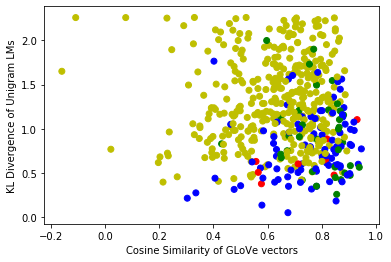

In [ ]:
# Plot GLoVe distance vs KL-Divergence on a coloured scatter plot with different colours for each label
colours = np.array(['g', 'r', 'b', 'y'])
plt.scatter(list(x_train[:, 0]), list(x_train[:, 1]), c=colours[y_train])
plt.xlabel('Cosine Similarity of GLoVe vectors')
plt.ylabel('KL Divergence of Unigram LMs')
print([(colours[i], int_to_label[i]) for i in range(len(int_to_label))])
plt.show()

In [ ]:
# Initialise x (feature vectors) for validation dataset
x_val = np.array([to_feature_array(doc) for doc in tqdm(val_all)])
print(x_val[:5])

100%|████████████████████████████████████████████████████████████████████████████████| 502/502 [00:05<00:00, 95.88it/s]

[[0.87189026 0.78067868 0.2388975 ]
 [0.77362252 0.82331639 0.48594791]
 [0.71733218 1.59193486 0.        ]
 [0.77513163 0.70753292 0.31846951]
 [0.87665324 0.38219986 0.28974359]]


In [ ]:
# Linear regression model
def mse(pred, gold):
    sigma = 0.0
    for i in range(pred.shape[0]):
        sigma += np.square(pred[i] - gold[i])
    return sigma / (2 * pred.shape[0])

print(mse(np.array([0.0, 0.2, 0.5, 0.5, 0.8, 1.0]), np.array([0, 0, 0, 1, 1, 1])))

0.04833333333333334


In [ ]:
class LinearRegression:
    
    def __init__(self, lrn_rate, n_iter):
        self.lrn_rate = lrn_rate
        self.n_iter = n_iter
        # self.breakpoints = set([n_iter * i // 10 for i in range(1, 11)])
        
    def fit(self, X, Y):
        # Learn a model y = intercept + x0*t0 + x1*t1 + x2*t2 + ... that minimises MSE. Need to optimise T
        # self.intercept = 0.0
        self.model = np.zeros(X.shape[1])  # model[0] = t0, model[1] = t1, etc.
        for it in tqdm(range(self.n_iter)):
            model_Y = self.transform(X)
            # Thetas
            for col in range(X.shape[1]):
                s = 0.0
                for row in range(X.shape[0]):
                    s += (model_Y[row] - Y[row]) * X[row, col]
                self.model[col] -= self.lrn_rate * s / X.shape[0]
            # Intercept
            # s_int = 0.0
            # for row in range(X.shape[0]):
            #     s_int += (model_Y[row] - Y[row]) * 1.0
            # self.intercept -= self.lrn_rate * s_int / X.shape[0]
            # if it + 1 in self.breakpoints:
                # print('Iteration', it+1, 'MSE:', mse(model_Y, Y))
        print('Final MSE:', mse(model_Y, Y))
        # print('Intercept:', self.intercept)
        print('Model:', self.model)
        
    def transform(self, X):
        # Returns a float value for each X. (Regression)
        Y = np.zeros(X.shape[0])
        for row in range(X.shape[0]):
            # s = self.intercept
            s = 0.0
            for col in range(X.shape[1]):
                s += self.model[col] * X[row, col]
            Y[row] = s
        return Y
    
    def predict(self, X):
        # Uses results of transform() for binary classification. For testing only, use OneVAllClassifier for the final run.
        Y = self.transform(X)
        Y = np.array([(1 if i > 0.5 else 0) for i in Y])
        return Y

# Test only
lr = LinearRegression(lrn_rate=0.1, n_iter=100)
lr.fit(x_train[:1000], np.array([(1 if i == 3 else 0) for i in y_train[:1000]]))
print(lr.transform(x_train[1000:1020]))
print('Predicted', lr.predict(x_train[1000:1020]))
print('Actual', np.array([(1 if i == 3 else 0) for i in y_train[1000:1020]]))

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 214.25it/s]

Final MSE: 0.07560286662295661
Model: [ 0.16264258  0.5190416  -0.2707051 ]
[]
Predicted []
Actual []


In [ ]:
# Logistic regression functions
def sigmoid(Y):
    return 1 / (1 + np.exp(Y * -1))

print(sigmoid(np.array([0.0, 0.2, 0.5, 0.5, 0.8, 1.0])))

def logistic_cost(pred, gold):
    sigma = 0.0
    for i in range(pred.shape[0]):
        if gold[i] == 1:  
            sigma -= np.log(pred[i])
        elif gold[i] == 0:
            sigma -= np.log(1 - pred[i])
    return sigma / pred.shape[0]

print(mse(np.array([0.0, 0.2, 0.5, 0.5, 0.8, 1.0]), np.array([0, 0, 0, 1, 1, 1])))
print(logistic_cost(np.array([0.0, 0.2, 0.5, 0.5, 0.8, 1.0]), np.array([0, 0, 0, 1, 1, 1])))
print(logistic_cost(sigmoid(np.array([0.0, 0.2, 0.5, 0.5, 0.8, 1.0])), np.array([0, 0, 0, 1, 1, 1])))

[0.5        0.549834   0.62245933 0.62245933 0.68997448 0.73105858]
0.04833333333333334
0.3054302439580517
0.6039670619612919


In [ ]:
# Logistic regression model
class LogisticRegression:
    
    def __init__(self, lrn_rate, n_iter):
        self.lrn_rate = lrn_rate
        self.n_iter = n_iter
        # self.breakpoints = set([n_iter * i // 10 for i in range(1, 11)])
        
    def fit(self, X, Y):
        # Learn a model y = x0*t0 + x1*t1 + x2*t2 + ... that minimises MSE. Need to optimise T
        self.model = np.zeros(X.shape[1])  # model[0] = t0, model[1] = t1, etc.
        for it in tqdm(range(self.n_iter)):
            model_Y = self.transform(X)
            for col in range(X.shape[1]):
                s = 0.0
                for row in range(X.shape[0]):
                    s += (model_Y[row] - Y[row]) * X[row, col]
                self.model[col] -= self.lrn_rate * s / X.shape[0]
            # if it + 1 in self.breakpoints:
                # print('Iteration', it+1, 'loss:', logistic_cost(model_Y, Y))
        print('Final loss:', logistic_cost(model_Y, Y))
        print('Model:', self.model)
        
    def transform(self, X):
        # Returns a float value for each X. (Regression)
        Y = np.zeros(X.shape[0])
        for row in range(X.shape[0]):
            s = 0.0
            for col in range(X.shape[1]):
                s += self.model[col] * X[row, col]
            Y[row] = s
        return sigmoid(Y)
    
    def predict(self, X):
        # Uses results of transform() for binary classification. For testing only, use OneVAllClassifier for the final run.
        Y = self.transform(X)
        Y = np.array([(1 if i > 0.5 else 0) for i in Y])
        return Y

# Test only
lr = LogisticRegression(lrn_rate=0.1, n_iter=100)
lr.fit(x_train[:1000], np.array([(1 if i == 3 else 0) for i in y_train[:1000]]))
print(lr.transform(x_train[1000:1020]))
print('Predicted', lr.predict(x_train[1000:1020]))
print('Actual', np.array([(1 if i == 3 else 0) for i in y_train[1000:1020]]))

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 202.54it/s]

Final loss: 0.484848352663648
Model: [-0.03172098  1.03656011 -0.39971637]
[]
Predicted []
Actual []


In [ ]:
# To use linear/logistic regression models to classify multiple classes
class OneVAllClassifier:
    
    def __init__(self, regression, **params):
        self.regression = regression
        self.params = params
        
    def fit(self, X, Y):
        # Learn a model for each parameter.
        self.categories = np.unique(Y)
        self.models = {}
        for cat in self.categories:
            ova_Y = np.array([(1 if i == cat else 0) for i in Y])
            model = self.regression(**self.params)
            model.fit(X, ova_Y)
            self.models[cat] = model
            print(int_to_label[cat])
    
    def predict(self, X):
        # Predicts each x for each different model learned, and returns the category related to the model with the highest score.
        vals = {}
        for cat, model in self.models.items():
            vals[cat] = model.transform(X)
        Y = np.zeros(X.shape[0], dtype=np.int)
        for row in range(X.shape[0]):
            max_val, max_cat = -math.inf, -math.inf
            for cat, val in vals.items():
                if val[row] > max_val:
                    max_val, max_cat = val[row], cat
            Y[row] = max_cat
        return Y
    
# Test only
ova = OneVAllClassifier(LinearRegression, lrn_rate=0.1, n_iter=100)
ova.fit(x_train[:1000], y_train[:1000])
print('Predicted', ova.predict(x_train[1000:1020]))
print('Actual', y_train[1000:1020])

 45%|████████████████████████████████████                                            | 45/100 [00:00<00:00, 198.10it/s]

Final MSE: 0.030942609881614288
Model: [ 0.13363787 -0.02838457  0.12399113]
agree


 21%|████████████████▊                                                               | 21/100 [00:00<00:00, 202.47it/s]

Final MSE: 0.007758642419530318
Model: [ 0.03534103 -0.01136144  0.0273887 ]
disagree


 12%|█████████▌                                                                      | 12/100 [00:00<00:00, 116.82it/s]

Final MSE: 0.057998285997644804
Model: [ 0.35101399 -0.09342772  0.30342663]
discuss


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 158.15it/s]

Final MSE: 0.07560286662295661
Model: [ 0.16264258  0.5190416  -0.2707051 ]
unrelated
Predicted []
Actual []


In [ ]:
# Train the linear regression & One-V-All classifier models on the train set
clf = OneVAllClassifier(LinearRegression, lrn_rate=0.1, n_iter=1000)
clf.fit(x_train, y_train)

  2%|█▊                                                                             | 23/1000 [00:00<00:04, 226.09it/s]

Final MSE: 0.029025231683839293
Model: [ 0.09551653 -0.03579025  0.47678124]
agree


  6%|████▎                                                                          | 55/1000 [00:00<00:03, 269.36it/s]

Final MSE: 0.007678320040489881
Model: [ 0.03600519 -0.0165486   0.093227  ]
disagree


  5%|████                                                                           | 51/1000 [00:00<00:03, 253.28it/s]

Final MSE: 0.047234664818422305
Model: [ 0.29648972 -0.12673286  1.11556414]
discuss


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 257.52it/s]

Final MSE: 0.052201947636044826
Model: [ 0.57193125  0.41600865 -1.58666296]
unrelated


In [ ]:
# Predict y for validation set
y_pred = clf.predict(x_val)
print(y_pred[:5])
predicted = np.array([int_to_label[i] for i in y_pred])
print(predicted[:5])
print(val_all[:, 2][:5])

NameError: name 'clf' is not defined

In [ ]:
# Prepare validation dataset format for score_submission in scorer.py
body_ids = [str(body_inverse_index[body]) for body in val_all[:, 1]]
pred_for_cm = np.array([{'Headline': val_all[i, 0], 'Body ID': body_ids[i], 'Stance': predicted[i]} for i in range(len(val_all))])
gold_for_cm = np.array([{'Headline': val_all[i, 0], 'Body ID': body_ids[i], 'Stance': val_all[i, 2]} for i in range(len(val_all))])

In [ ]:
# Score using scorer.py (provided in https://github.com/FakeNewsChallenge/fnc-1) on VALIDATION set:
test_score, cm = score_submission(gold_for_cm, pred_for_cm)
null_score, max_score = score_defaults(gold_for_cm)
print_confusion_matrix(cm)
print(SCORE_REPORT.format(max_score, null_score, test_score))

CONFUSION MATRIX:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |     0     |     0     |    30     |     7     |
-------------------------------------------------------------
| disagree  |     0     |     0     |     4     |     5     |
-------------------------------------------------------------
|  discuss  |     0     |     0     |    70     |    20     |
-------------------------------------------------------------
| unrelated |     0     |     0     |     6     |    360    |
-------------------------------------------------------------
ACCURACY: 0.857

MAX  - the best possible score (100% accuracy)
NULL - score as if all predicted stances were unrelated
TEST - score based on the provided predictions

||    MAX    ||    NULL   ||    TEST   ||
||   227.5   ||   91.5    ||   168.5   ||



In [ ]:
# Predict y for validation set using logistic regression instead of linear regression, and compare results of scorer.py
clf_logistic = OneVAllClassifier(LogisticRegression, lrn_rate=0.1, n_iter=1000)
clf_logistic.fit(x_train, y_train)

y_pred = clf_logistic.predict(x_val)
predicted = np.array([int_to_label[i] for i in y_pred])

body_ids = [str(body_inverse_index[body]) for body in val_all[:, 1]]
pred_for_cm = np.array([{'Headline': val_all[i, 0], 'Body ID': body_ids[i], 'Stance': predicted[i]} for i in range(len(val_all))])
gold_for_cm = np.array([{'Headline': val_all[i, 0], 'Body ID': body_ids[i], 'Stance': val_all[i, 2]} for i in range(len(val_all))])

test_score, cm = score_submission(gold_for_cm, pred_for_cm)
null_score, max_score = score_defaults(gold_for_cm)
print()
print_confusion_matrix(cm)
print(SCORE_REPORT.format(max_score, null_score, test_score))
# linear regression performs better, so that model is chosen for the test set

  5%|████▎                                                                          | 54/1000 [00:00<00:03, 271.79it/s]

Final loss: 0.2500813657175405
Model: [-0.72436045 -1.99140168  0.75132424]
agree


  6%|████▍                                                                          | 56/1000 [00:00<00:03, 270.97it/s]

Final loss: 0.07455027920977261
Model: [-1.77378594 -2.92872592 -0.16038989]
disagree


  2%|█▏                                                                             | 15/1000 [00:00<00:06, 141.89it/s]

Final loss: 0.3328454889108511
Model: [ 0.74406215 -2.27140776  2.18769065]
discuss


100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 238.34it/s]

Final loss: 0.33204125814704716
Model: [-1.63168023  2.41203715 -3.26364398]
unrelated

CONFUSION MATRIX:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |     0     |     0     |    20     |    17     |
-------------------------------------------------------------
| disagree  |     0     |     0     |     2     |     7     |
-------------------------------------------------------------
|  discuss  |     0     |     0     |    45     |    45     |
-------------------------------------------------------------
| unrelated |     0     |     0     |     9     |    357    |
-------------------------------------------------------------
ACCURACY: 0.801

MAX  - the best possible score (100% accuracy)
NULL - score as if all predicted stances were unrelated
TEST - score based on the provided predictions

||    MAX    ||    NULL   ||    TEST   ||
||

**Test the model on FNC-1 test dataset**

In [ ]:
DATASET_PATH = os.path.join(os.getcwd(),"C:\\Users\\Shreyansh\\Abhinav\data","")

competition_test_bodies = pd.read_csv(DATASET_PATH+"competition_test_bodies.csv",encoding='ISO-8859-1')

In [ ]:
competition_test_bodies.shape

(904, 2)

In [ ]:
competition_test_stances = pd.read_csv(DATASET_PATH+"competition_test_stances.csv",encoding='ISO-8859-1')

In [ ]:
competition_test_bodies.shape

(904, 2)

In [ ]:
DATASET_PATH = os.path.join(os.getcwd(),"C:\\Users\\Shreyansh\\Abhinav\data","")

competition_test_bodies = pd.read_csv(DATASET_PATH+"competition_test_bodies.csv",encoding='ISO-8859-1')
competition_test_stances = pd.read_csv(DATASET_PATH+"competition_test_stances.csv",encoding='ISO-8859-1')

In [ ]:
competition_test_bodies.head()

,Body ID,articleBody
0,1,Al-Sisi has denied Israeli reports stating tha...
1,2,A bereaved Afghan mother took revenge on the T...
2,3,CNBC is reporting Tesla has chosen Nevada as t...
3,12,A 4-inch version of the iPhone 6 is said to be...
4,19,GR editors Note\n\nThere are no reports in th...


In [ ]:
competition_test_stances.head()

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated


In [ ]:
Test_data_combined = pd.read_csv(DATASET_PATH+"Test_data_combined.csv",encoding='ISO-8859-1')

In [ ]:
Test_data_combined.head()

,Headline,Body ID,articleBody,jaccard_similarity,Headline_Nouns,articleBody_Nouns,jaccard_similarity_nouns,Headline_POS,articleBody_POS
0,ferguson riots pregnant woman loses eye cops f...,2008,respected senior french police officer investi...,0.000000,cops eye car riots bag woman window round,limoges office commissioners town supermarket ...,0.000000,bean cops fire eye pregnant car riots bag ferg...,limoges like particular supermarket mirror pai...
1,crazy conservatives sure gitmo detainee killed...,1550,dave morin social networking company path repo...,0.000000,james conservatives detainee,email path ceo aims techcrunch newsletter pric...,0.000000,conservatives crazy foley james sure detainee ...,email newsletter acquisition incorporated acco...
2,russian guy says justin bieber ringtone saved ...,2,bereaved afghan mother took revenge taliban wa...,13.157895,bieber guy justin ringtone attack,gains weapon daughterinlaw hamid taliban week ...,29.850746,attack says saved bieber bear guy russian just...,particular using tuesday check daughter broadc...
3,zombie cat buried kitty believed dead meows ba...,1793,hewlettpackard officially splitting two follow...,0.000000,life cat zombie meows,position part experiences leo acquisition part...,0.000000,buried life zombie dead meows believed cat kitty,position laptop appointed part particular expe...
4,argentina president adopts boy end werewolf curse,37,airline passenger headed dallas removed plane ...,0.000000,president adopts werewolf curse,workers plane everyone board airline attendant...,0.000000,president end adopts curse argentina boy werewolf,began workers celebrates plane everyone board ...


In [ ]:
test_bodies_my_data = Test_data_combined[["Body ID","articleBody_POS"]]
test_bodies_my_data.rename(columns = {'articleBody_POS': 'articleBody'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_headline_my_data = Test_data_combined[["Headline_POS","Body ID"]]
test_headline_my_data.rename(columns = {'Headline_POS': 'Headline'}, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
test_headline_my_data["Stance"] = competition_test_stances["Stance"]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test_headline_my_data.head()

,Headline,Body ID,Stance
0,bean cops fire eye pregnant car riots bag ferg...,2008,unrelated
1,conservatives crazy foley james sure detainee ...,1550,unrelated
2,attack says saved bieber bear guy russian just...,2,unrelated
3,buried life zombie dead meows believed cat kitty,1793,unrelated
4,president end adopts curse argentina boy werewolf,37,unrelated


In [ ]:
test_headline_my_data.to_csv('test_headline_my_data.csv')
test_bodies_my_data.to_csv('test_bodies_my_data.csv')


In [ ]:
test_headline_my_data.head()

,Headline,Body ID,Stance
0,bean cops fire eye pregnant car riots bag ferg...,2008,unrelated
1,conservatives crazy foley james sure detainee ...,1550,unrelated
2,attack says saved bieber bear guy russian just...,2,unrelated
3,buried life zombie dead meows believed cat kitty,1793,unrelated
4,president end adopts curse argentina boy werewolf,37,unrelated


In [ ]:
# Load test data from CSV
f_tbodies = open('data/test_bodies_my_data.csv', 'r', encoding='ISO-8859-1')
csv_tbodies = csv.DictReader(f_tbodies)
tbodies = []
for row in csv_tbodies:
    body_id = int(row['Body ID'])
    if (body_id + 1) > len(tbodies):
        tbodies += [None] * (body_id + 1 - len(tbodies))
    tbodies[body_id] = row['articleBody']
f_tbodies.close()
tbody_inverse_index = {tbodies[i]: i for i in range(len(tbodies))}

test_all = []  # each article = (headline, body, stance)

f_tstances = open('data/test_headline_my_data.csv', 'r', encoding='ISO-8859-1')
csv_tstances = csv.DictReader(f_tstances)
for row in csv_tstances:
    body = tbodies[int(row['Body ID'])]
    test_all.append((row['Headline'], body, row['Stance']))
f_tstances.close()

#test_all = np.array(test_all)  # for some reason gives MemoryError
#print(test_all.shape)

In [ ]:
# Initialise x (feature vectors) and y for test dataset
x_test = np.array([to_feature_array(doc) for doc in tqdm(test_all)])
print(x_test[:5])

100%|███████████████████████████████████████████████████████████████████████████| 25413/25413 [03:17<00:00, 128.58it/s]

[[0.82238215 1.77919325 0.        ]
 [0.59040958 1.58384738 0.        ]
 [0.71089599 1.43037371 0.        ]
 [0.60790418 1.03524844 0.        ]
 [0.74988613 2.02504285 0.        ]]


In [ ]:
# Predict y for test set
y_test = clf.predict(x_test)
print(y_pred[:5])
pred_test = np.array([int_to_label[i] for i in y_test])
print(pred_test[:5])

[3 2 3 2 2]
['unrelated' 'unrelated' 'unrelated' 'unrelated' 'unrelated']


In [ ]:
# Prepare test dataset format for score_submission in scorer.py
test_body_ids = [str(tbody_inverse_index[test_all[i][1]]) for i in range(len(test_all))]
test_pred_for_cm = np.array([{'Headline': test_all[i][0], 'Body ID': test_body_ids[i], 'Stance': pred_test[i]} for i in range(len(test_all))])
test_gold_for_cm = np.array([{'Headline': test_all[i][0], 'Body ID': test_body_ids[i], 'Stance': test_all[i][2]} for i in range(len(test_all))])

In [ ]:
# Score using scorer.py (provided in https://github.com/FakeNewsChallenge/fnc-1) on TEST set:
test_score, cm = score_submission(test_gold_for_cm, test_pred_for_cm)
null_score, max_score = score_defaults(test_gold_for_cm)
print_confusion_matrix(cm)
print(SCORE_REPORT.format(max_score, null_score, test_score))

CONFUSION MATRIX:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |     0     |     0     |   1442    |    461    |
-------------------------------------------------------------
| disagree  |     0     |     0     |    433    |    264    |
-------------------------------------------------------------
|  discuss  |     5     |     0     |   3355    |   1104    |
-------------------------------------------------------------
| unrelated |     6     |     0     |    231    |   18112   |
-------------------------------------------------------------
ACCURACY: 0.845

MAX  - the best possible score (100% accuracy)
NULL - score as if all predicted stances were unrelated
TEST - score based on the provided predictions

||    MAX    ||    NULL   ||    TEST   ||
|| 11651.25  ||  4587.25  ||  8353.0   ||



## Comparison Models

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier   
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import xgboost
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.semi_supervised import LabelPropagation

classifiers=[
    
    (LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=100.0, fit_intercept=True,
    intercept_scaling=10, class_weight=None, random_state=None, solver='liblinear', max_iter=10,
    multi_class='ovr', verbose=0, warm_start=False, n_jobs=None),"Logistic Regression"),
    
    
    (KNeighborsClassifier(1),"K Nearest Classifier "),
    
    (SVC(C=50.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False),'Support Vector Machine Classifier'),
    
    (QuadraticDiscriminantAnalysis(),'Qudratic Discriminant Analysis'),
    
    (RandomForestClassifier(max_depth=50, n_estimators=10, max_features=1),'Random Forest Classifier'),
    
    (AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.01,
                        algorithm='SAMME.R', random_state=None),'Adaboost Classifier'),
    (SGDClassifier(),'SGD Classifier'),
    
    (DecisionTreeClassifier(max_depth=5),'Decision Tree Classifier'),
    (xgboost.XGBClassifier(learning_rate=0.1),'XG Boost Classifier'),
    
    (LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, 
        store_covariance=False,tol=0.00001),'Linear Discriminant Analysis'),
     
    (GaussianNB(),'Gaussian Naive Bayes ')
]

In [ ]:
#!pip install -U scikit-learn

In [ ]:
['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

In [ ]:
score=[];names=[]

for model,name in classifiers:
    clf= model.fit(x_train,y_train)
    y_pred=clf.predict(x_val)
    predicted = np.array([int_to_label[i] for i in y_pred])
    body_ids = [str(body_inverse_index[body]) for body in val_all[:, 1]]
    pred_for_cm = np.array([{'Headline': val_all[i, 0], 'Body ID': body_ids[i], 'Stance': predicted[i]} for i in range(len(val_all))])
    gold_for_cm = np.array([{'Headline': val_all[i, 0], 'Body ID': body_ids[i], 'Stance': val_all[i, 2]} for i in range(len(val_all))])
    
    test_score, cm = score_submission(gold_for_cm, pred_for_cm)
    null_score, max_score = score_defaults(gold_for_cm)
    print('*'*20);names.append(name)
    print(name)
    score.append(print_confusion_matrix(cm));
    a=SCORE_REPORT.format(max_score, null_score, test_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


********************
Logistic Regression
CONFUSION MATRIX:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |     0     |     0     |    35     |     2     |
-------------------------------------------------------------
| disagree  |     0     |     0     |     4     |     5     |
-------------------------------------------------------------
|  discuss  |     0     |     0     |    78     |    12     |
-------------------------------------------------------------
| unrelated |     0     |     0     |     5     |    361    |
-------------------------------------------------------------
ACCURACY: 0.875
********************
K Nearest Classifier 
CONFUSION MATRIX:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
----------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


********************
XG Boost Classifier
CONFUSION MATRIX:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
-------------------------------------------------------------
|   agree   |     6     |     2     |    26     |     3     |
-------------------------------------------------------------
| disagree  |     0     |     0     |     5     |     4     |
-------------------------------------------------------------
|  discuss  |    18     |     5     |    59     |     8     |
-------------------------------------------------------------
| unrelated |     3     |     0     |    10     |    353    |
-------------------------------------------------------------
ACCURACY: 0.833
********************
Linear Discriminant Analysis
CONFUSION MATRIX:
-------------------------------------------------------------
|           |   agree   | disagree  |  discuss  | unrelated |
---------------------------------------------------

In [ ]:
for i in range(len(score)):
    score[i]=score[i]*100
print(score)

[87.45019920318725, 80.0796812749004, 87.25099601593625, 86.45418326693228, 84.66135458167331, 85.2589641434263, 87.64940239043824, 83.66533864541833, 83.26693227091634, 86.65338645418326, 84.4621513944223]


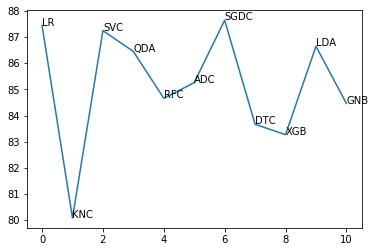

In [ ]:
names=['LR','KNC','SVC','QDA','RFC','ADC','SGDC','DTC','XGB','LDA','GNB']
import seaborn as sns
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
A = score[:]
plt.plot(A)
for i, label in enumerate(names):
    plt.text(i,A[i], label)
plt.show()